# Lab1 Defense

# Import library

In [127]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [128]:
# Load dataset

In [129]:
# Load dataset
dataset = pd.read_csv("def.csv")

# Check if the csv file has been well loaded by showing a sample of data
dataset.sample(5)

,Gender,City,Month Salary,Debt,Code
789,1,Klaipeda,1349.0,952052,30
1148,0,Kaunas,1703.0,1845119,10
807,1,Kaunas,1904.0,979269,10
800,1,Kaunas,1530.0,878887,10
1716,0,Kaunas,2304.0,2937231,10


**Check attributes types**

In [130]:
dataset.dtypes

Gender           object
City             object
Month Salary    float64
Debt              int64
Code              int64
dtype: object

# Dataset quality analysis

## Statistics

In [131]:
# create empty lists to store the results
results_categories = []
results_numericals = []

for column in dataset.columns:
    # check if the column is a category
    if dataset[column].dtype == 'object':
        result = {}
        result['Attribute'] = column
        result['Total Values'] = dataset[column].count()
        result['Percentage of Missing Values'] = (dataset[column].isnull().sum() / dataset[column].shape[0]) * 100
        result['Cardinality'] = dataset[column].nunique()
        
        value_counts = dataset[column].value_counts()
        result['Mode'] = value_counts.index[0]
        result['Frequency of Mode'] = value_counts.iloc[0]
        result['Percentage of Mode'] = (value_counts.iloc[0] / dataset[column].count()) * 100
        # Check if 2nd Mode exists
        if value_counts.shape[0] > 1:
            result['2nd Mode'] = value_counts.index[1]
            result['Frequency of 2nd Mode'] = value_counts.iloc[1]
            result['Percentage of 2nd Mode'] = (value_counts.iloc[1] / dataset[column].count()) * 100
            
        results_categories.append(result)

    # check if the column is numeric
    else:
        result = {}
        result['Attribute'] = column
        result['Total Values'] = dataset[column].count()
        result['Percentage of Missing Values'] = (dataset[column].isnull().sum() / dataset[column].shape[0]) * 100
        result['Cardinality'] = dataset[column].nunique()
        result['Min'] = dataset[column].min()
        result['Max'] = dataset[column].max()
        result['1st Quartile'] = dataset[column].quantile(0.25)
        result['3rd Quartile'] = dataset[column].quantile(0.75)
        result['Average'] = dataset[column].mean()
        result['Median'] = dataset[column].median()
        result['Standard Deviation'] = dataset[column].std()
        results_numericals.append(result)

In [132]:
# Create dataframes from results lists
results_categories_df = pd.DataFrame(results_categories)
results_numericals_df = pd.DataFrame(results_numericals)

# Display dataframes
print(results_numericals_df.to_markdown())
print(results_categories_df.to_markdown())

|    | Attribute    |   Total Values |   Percentage of Missing Values |   Cardinality |   Min |            Max |   1st Quartile |   3rd Quartile |        Average |         Median |   Standard Deviation |
|---:|:-------------|---------------:|-------------------------------:|--------------:|------:|---------------:|---------------:|---------------:|---------------:|---------------:|---------------------:|
|  0 | Month Salary |           1756 |                       0.227273 |          1128 |  1000 | 3000           | 1387           | 2385           | 1929.39        | 2009           |        571.091       |
|  1 | Debt         |           1760 |                       0        |          1759 |  1072 |    2.45223e+09 |    1.32432e+06 |    2.49838e+06 |    3.70917e+06 |    1.83531e+06 |          6.01174e+07 |
|  2 | Code         |           1760 |                       0        |             3 |    10 |   30           |   10           |   30           |   19.892       |   20           |    

|    | Attribute    |   Total Values |   Percentage of Missing Values |   Cardinality |   Min |            Max |   1st Quartile |   3rd Quartile |        Average |         Median |   Standard Deviation |
|---:|:-------------|---------------:|-------------------------------:|--------------:|------:|---------------:|---------------:|---------------:|---------------:|---------------:|---------------------:|
|  0 | Month Salary |           1756 |                       0.227273 |          1128 |  1000 | 3000           | 1387           | 2385           | 1929.39        | 2009           |        571.091       |
|  1 | Debt         |           1760 |                       0        |          1759 |  1072 |    2.45223e+09 |    1.32432e+06 |    2.49838e+06 |    3.70917e+06 |    1.83531e+06 |          6.01174e+07 |
|  2 | Code         |           1760 |                       0        |             3 |    10 |   30           |   10           |   30           |   19.892       |   20           |          8.11653     |

|    | Attribute   |   Total Values |   Percentage of Missing Values |   Cardinality | Mode    |   Frequency of Mode |   Percentage of Mode | 2nd Mode   |   Frequency of 2nd Mode |   Percentage of 2nd Mode |
|---:|:------------|---------------:|-------------------------------:|--------------:|:--------|--------------------:|---------------------:|:-----------|------------------------:|-------------------------:|
|  0 | Gender      |           1760 |                              0 |             6 | 0       |                 877 |              49.8295 | 1          |                     875 |                  49.7159 |
|  1 | City        |           1760 |                              0 |             3 | Vilnius |                 601 |              34.1477 | Kaunas     |                     589 |                  33.4659 |


## Problems identified

- Month Salary : Problem of missing values
- Debt : Problem outliers min max
- Gender : Cardinality problem

## Investigating data quality with graphical representation

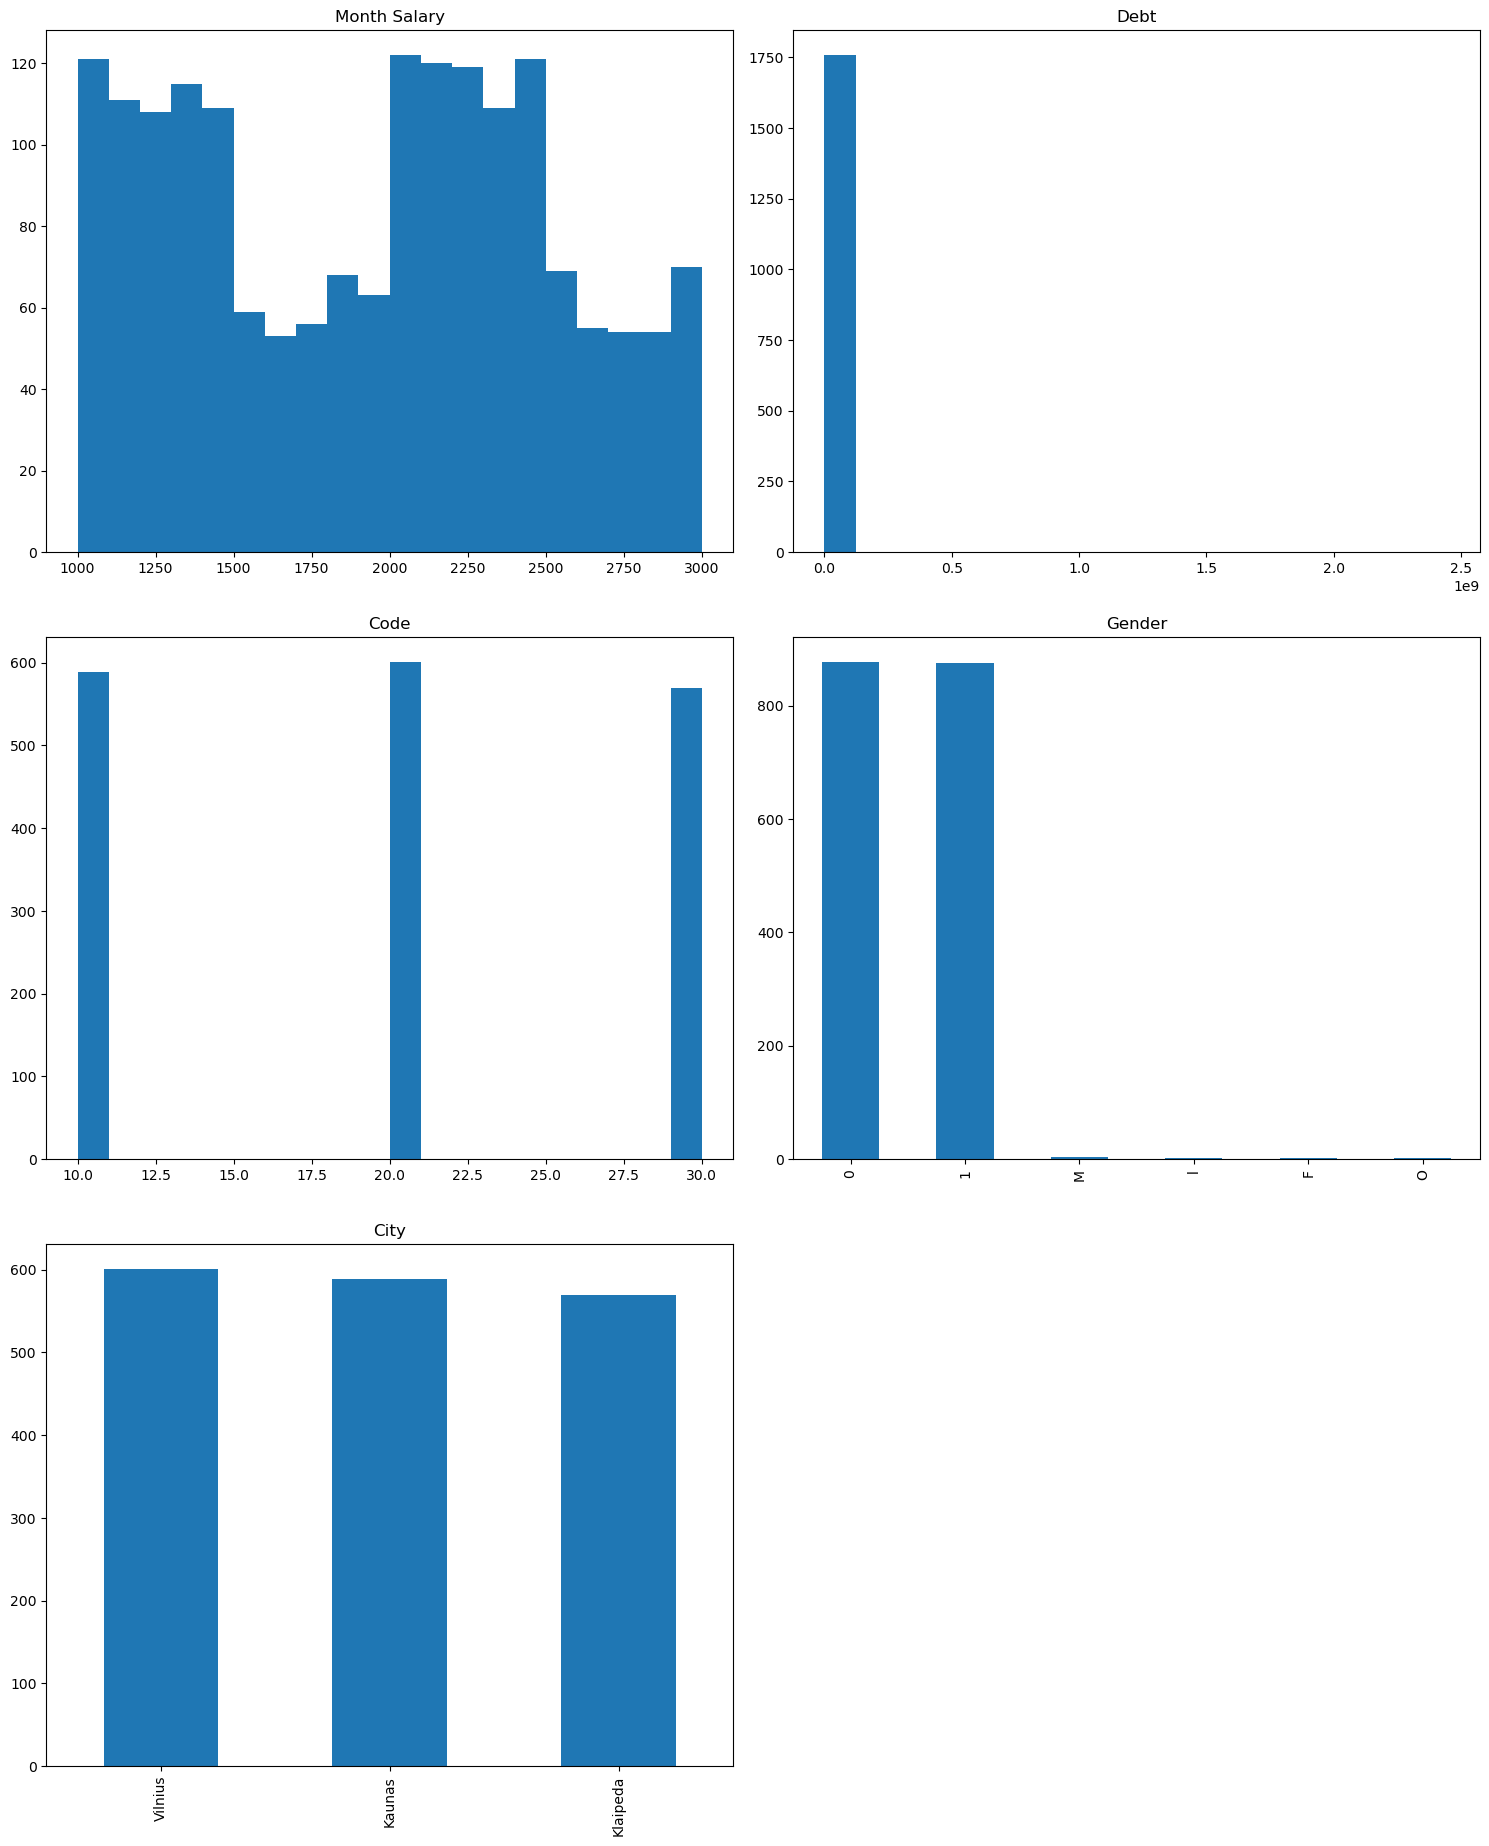

In [133]:
# calculate the recommended number of histogram columns
histogram_col_nb = int(1 + 3.22 * np.log(dataset.shape[0]))

# determine the number of rows needed for the plot
num_histogram_rows = len(dataset.select_dtypes(include=['float64', 'int64']).columns) + \
                     len(dataset.select_dtypes(include=['object']).columns)

# set the height of each subplot
fig, axs = plt.subplots(num_histogram_rows, 2, figsize=(15, 30))

# flatten the array of subplots so that we can easily loop through them
axs = axs.flatten()

# loop through each continuous column of the dataframe
for i, column in enumerate(dataset.select_dtypes(include=['float64', 'int64']).columns):
    # plot the histogram for the column
    axs[i].hist(dataset[column].dropna(), bins=20)
    axs[i].set_title(column)
   
# loop through each categorical column of the dataframe
for i, column in enumerate(dataset.select_dtypes(include=['object']).columns):
    # plot the histogram for the column
    dataset[column].value_counts().plot(kind='bar', ax=axs[i + len(dataset.select_dtypes(include=['float64', 'int64']).columns)])
    axs[i + len(dataset.select_dtypes(include=['float64', 'int64']).columns)].set_title(column)
    
# remove unused subplots
for i in range(len(dataset.columns), len(axs)):
    fig.delaxes(axs[i])

# show the plot
plt.tight_layout()
plt.show()

## Fill empty values in Month Salary

The attribute Month Salary has some missing values. We can fill them with the median (2009).

In [134]:
dataset['Month Salary'] = np.where(dataset['Month Salary'].isnull(), dataset['Month Salary'].median(),dataset['Month Salary'])

In [135]:
dataset['Month Salary'].isnull().sum()

0

## Cardinality problem

**Check all options**

In [136]:
dataset['Gender'].unique()

array(['1', 'l', 'M', '0', 'O', 'F'], dtype=object)

We have a cardinality problem with the attribute Gender. We have 6 options: ['1', 'l', 'M', '0', 'O', 'F']. After plotting them, we see that most are 0 and 1. To solve this problem we can map 'M' and 'F' to '0' and '1', and map 'O' to 0 and 'l' to '1'.

In [137]:
dataset['Gender'].replace({'l':'1','O':'0', 'F':'1', 'M':'0', },inplace=True)
dataset['Gender'].unique()

array(['1', '0'], dtype=object)

## Eliminate outliers

For each values which is out of bound we modify it to its closest bound.

Example: 

- If value < min => value = min
- If value > max => value = max

In [138]:

dataset.Debt = np.where((dataset.Debt > dataset['Debt'].quantile(0.98)) , dataset['Debt'].quantile(0.98), dataset.Debt)
dataset.Debt = np.where((dataset.Debt < dataset['Debt'].quantile(0.02)) , dataset['Debt'].quantile(0.02), dataset.Debt)



**Plot new histogram**

<AxesSubplot:ylabel='Frequency'>

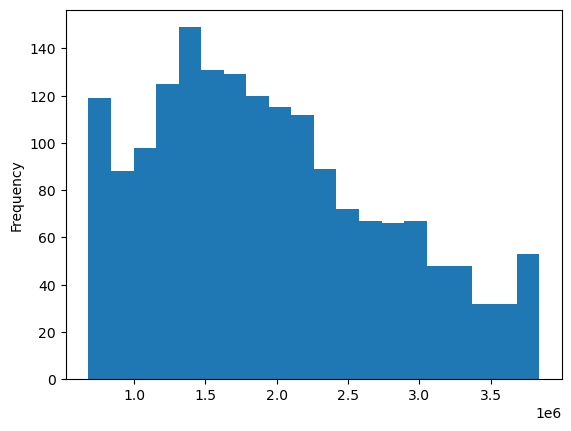

In [139]:
dataset['Debt'].plot(kind='hist', bins=20)

## Show new plots

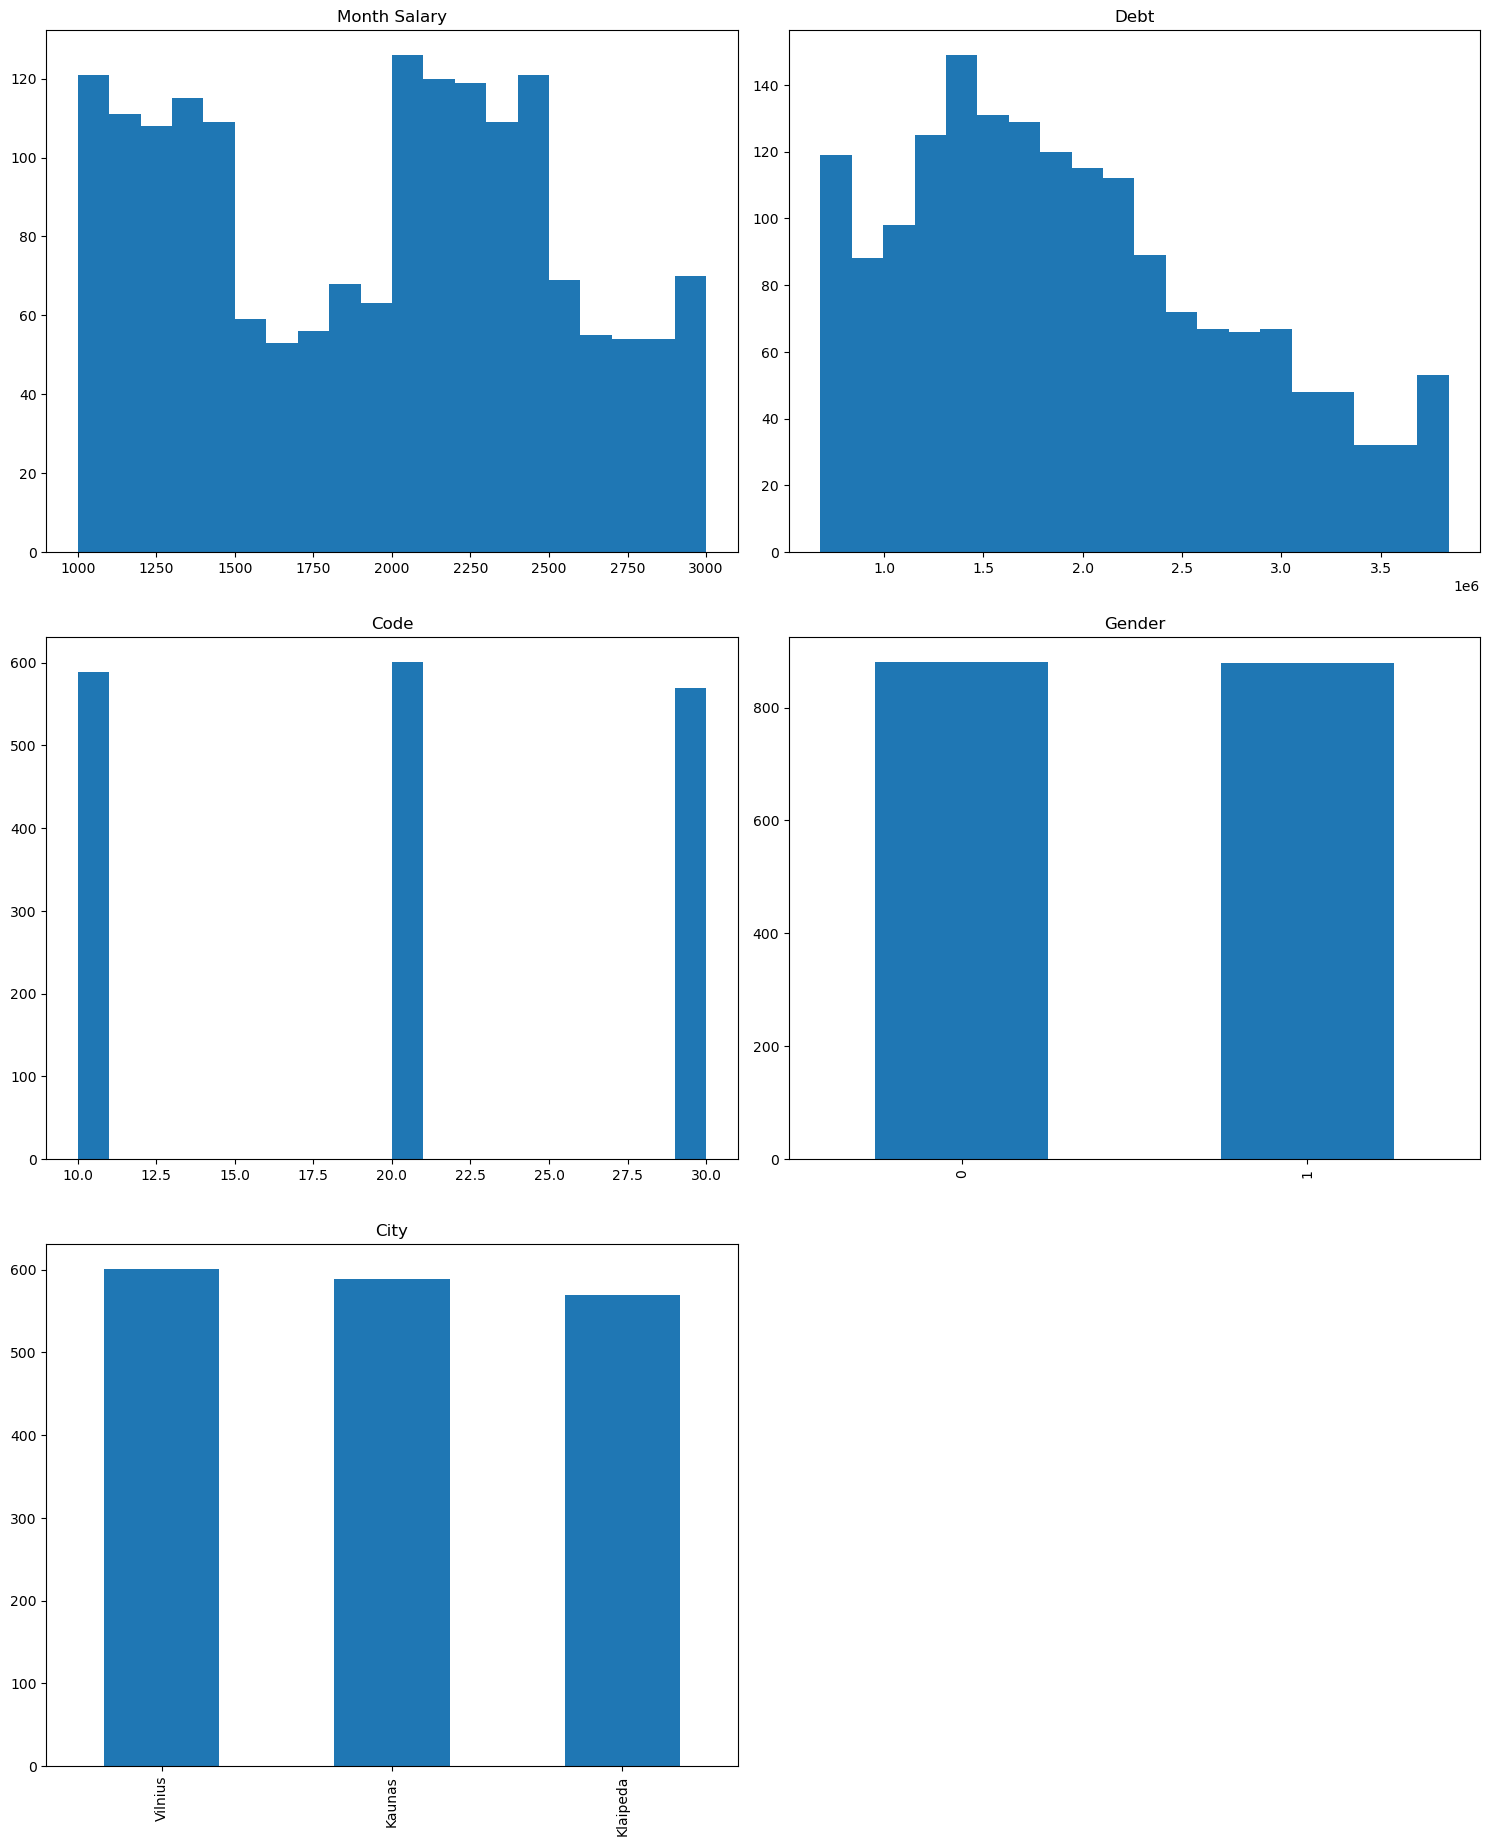

In [140]:
# calculate the recommended number of histogram columns
histogram_col_nb = int(1 + 3.22 * np.log(dataset.shape[0]))

# determine the number of rows needed for the plot
num_histogram_rows = len(dataset.select_dtypes(include=['float64', 'int64']).columns) + \
                     len(dataset.select_dtypes(include=['object']).columns)

# set the height of each subplot
fig, axs = plt.subplots(num_histogram_rows, 2, figsize=(15, 30))

# flatten the array of subplots so that we can easily loop through them
axs = axs.flatten()

# loop through each continuous column of the dataframe
for i, column in enumerate(dataset.select_dtypes(include=['float64', 'int64']).columns):
    # plot the histogram for the column
    axs[i].hist(dataset[column].dropna(), bins=20)
    axs[i].set_title(column)
   
# loop through each categorical column of the dataframe
for i, column in enumerate(dataset.select_dtypes(include=['object']).columns):
    # plot the histogram for the column
    dataset[column].value_counts().plot(kind='bar', ax=axs[i + len(dataset.select_dtypes(include=['float64', 'int64']).columns)])
    axs[i + len(dataset.select_dtypes(include=['float64', 'int64']).columns)].set_title(column)
    
# remove unused subplots
for i in range(len(dataset.columns), len(axs)):
    fig.delaxes(axs[i])

# show the plot
plt.tight_layout()
plt.show()

## New statistics

In [141]:
# create empty lists to store the results
results_categories = []
results_numericals = []

for column in dataset.columns:
    # check if the column is a category
    if dataset[column].dtype == 'object':
        result = {}
        result['Attribute'] = column
        result['Total Values'] = dataset[column].count()
        result['Percentage of Missing Values'] = (dataset[column].isnull().sum() / dataset[column].shape[0]) * 100
        result['Cardinality'] = dataset[column].nunique()
        
        value_counts = dataset[column].value_counts()
        result['Mode'] = value_counts.index[0]
        result['Frequency of Mode'] = value_counts.iloc[0]
        result['Percentage of Mode'] = (value_counts.iloc[0] / dataset[column].count()) * 100
        # Check if 2nd Mode exists
        if value_counts.shape[0] > 1:
            result['2nd Mode'] = value_counts.index[1]
            result['Frequency of 2nd Mode'] = value_counts.iloc[1]
            result['Percentage of 2nd Mode'] = (value_counts.iloc[1] / dataset[column].count()) * 100
            
        results_categories.append(result)

    # check if the column is numeric
    else:
        result = {}
        result['Attribute'] = column
        result['Total Values'] = dataset[column].count()
        result['Percentage of Missing Values'] = (dataset[column].isnull().sum() / dataset[column].shape[0]) * 100
        result['Cardinality'] = dataset[column].nunique()
        result['Min'] = dataset[column].min()
        result['Max'] = dataset[column].max()
        result['1st Quartile'] = dataset[column].quantile(0.25)
        result['3rd Quartile'] = dataset[column].quantile(0.75)
        result['Average'] = dataset[column].mean()
        result['Median'] = dataset[column].median()
        result['Standard Deviation'] = dataset[column].std()
        results_numericals.append(result)

In [142]:
# Create dataframes from results lists
results_categories_df = pd.DataFrame(results_categories)
results_numericals_df = pd.DataFrame(results_numericals)

# Display dataframes
print(results_numericals_df.to_markdown())
print(results_categories_df.to_markdown())

|    | Attribute    |   Total Values |   Percentage of Missing Values |   Cardinality |    Min |            Max |   1st Quartile |   3rd Quartile |        Average |         Median |   Standard Deviation |
|---:|:-------------|---------------:|-------------------------------:|--------------:|-------:|---------------:|---------------:|---------------:|---------------:|---------------:|---------------------:|
|  0 | Month Salary |           1760 |                              0 |          1128 |   1000 | 3000           | 1387           | 2381.25        | 1929.57        | 2009           |            570.454   |
|  1 | Debt         |           1760 |                              0 |          1689 | 679149 |    3.84152e+06 |    1.32432e+06 |    2.49838e+06 |    1.95638e+06 |    1.83531e+06 |         817535       |
|  2 | Code         |           1760 |                              0 |             3 |     10 |   30           |   10           |   30           |   19.892       |   20           

|    | Attribute    |   Total Values |   Percentage of Missing Values |   Cardinality |    Min |            Max |   1st Quartile |   3rd Quartile |        Average |         Median |   Standard Deviation |
|---:|:-------------|---------------:|-------------------------------:|--------------:|-------:|---------------:|---------------:|---------------:|---------------:|---------------:|---------------------:|
|  0 | Month Salary |           1760 |                              0 |          1128 |   1000 | 3000           | 1387           | 2381.25        | 1929.57        | 2009           |            570.454   |
|  1 | Debt         |           1760 |                              0 |          1689 | 679149 |    3.84152e+06 |    1.32432e+06 |    2.49838e+06 |    1.95638e+06 |    1.83531e+06 |         817535       |
|  2 | Code         |           1760 |                              0 |             3 |     10 |   30           |   10           |   30           |   19.892       |   20           |              8.11653 |

|    | Attribute   |   Total Values |   Percentage of Missing Values |   Cardinality | Mode    |   Frequency of Mode |   Percentage of Mode | 2nd Mode   |   Frequency of 2nd Mode |   Percentage of 2nd Mode |
|---:|:------------|---------------:|-------------------------------:|--------------:|:--------|--------------------:|---------------------:|:-----------|------------------------:|-------------------------:|
|  0 | Gender      |           1760 |                              0 |             2 | 0       |                 881 |              50.0568 | 1          |                     879 |                  49.9432 |
|  1 | City        |           1760 |                              0 |             3 | Vilnius |                 601 |              34.1477 | Kaunas     |                     589 |                  33.4659 |


# Investigation relationships

array([[<AxesSubplot:xlabel='Month Salary', ylabel='Month Salary'>,
        <AxesSubplot:xlabel='Debt', ylabel='Month Salary'>,
        <AxesSubplot:xlabel='Code', ylabel='Month Salary'>],
       [<AxesSubplot:xlabel='Month Salary', ylabel='Debt'>,
        <AxesSubplot:xlabel='Debt', ylabel='Debt'>,
        <AxesSubplot:xlabel='Code', ylabel='Debt'>],
       [<AxesSubplot:xlabel='Month Salary', ylabel='Code'>,
        <AxesSubplot:xlabel='Debt', ylabel='Code'>,
        <AxesSubplot:xlabel='Code', ylabel='Code'>]], dtype=object)

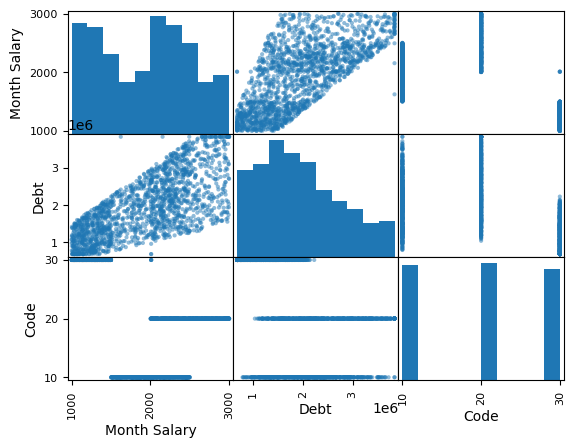

In [143]:
# Plot splom diagram
pd.plotting.scatter_matrix(dataset)

# Investigating relationship between City and Month Salary

array([[<AxesSubplot:title={'center':'Kaunas'}>,
        <AxesSubplot:title={'center':'Klaipeda'}>],
       [<AxesSubplot:title={'center':'Vilnius'}>, <AxesSubplot:>]],
      dtype=object)

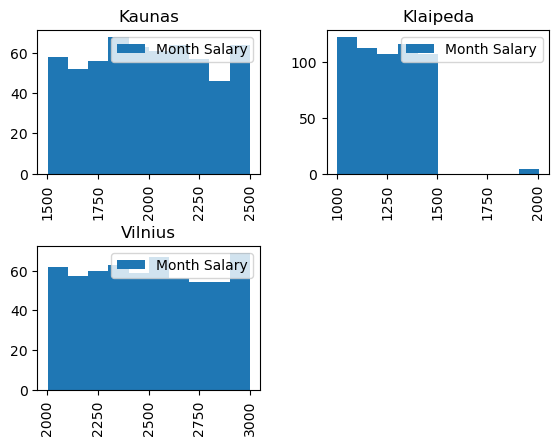

In [144]:
dataset.hist(by ='City', column =['Month Salary'], grid = False, legend=True)

<AxesSubplot:title={'center':'Month Salary'}, xlabel='City'>

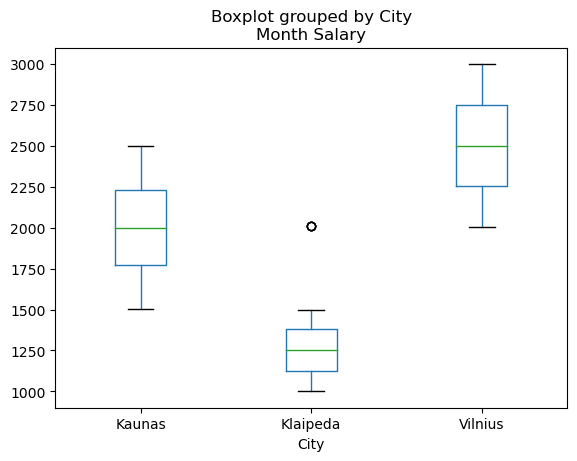

In [145]:
dataset.boxplot(by ='City', column =['Month Salary'], grid = False)

**Conclusion:**
- Outlier for Klaipeda city
- Overall linear
- Different min and max


The salary depends a lot on the city you work in. On average Vilnius has the highest salary, then Kaunas and then Klaipeda. Their min and max are also different. For Vilnius it is around 2000 and 3000. For Kaunas around 1500 and 2500. For Klaipeda, around 1000 and 1500 except for an outlier.

# Convert categorical to numerical

## Look at unique values

In [146]:
dataset['Gender'].unique()

array(['1', '0'], dtype=object)

In [147]:
dataset['City'].unique()

array(['Vilnius', 'Klaipeda', 'Kaunas'], dtype=object)

## Change values to numerical ones 

In [148]:
dataset['Gender'].replace({'1':1,'0':0 },inplace=True)
dataset['City'].replace({'Vilnius':0,'Kaunas':1, 'Klaipeda':2 },inplace=True)


In [149]:
dataset.dtypes

Gender            int64
City              int64
Month Salary    float64
Debt            float64
Code              int64
dtype: object

## Correlation values

In [150]:
dataset.corr(numeric_only=True)

,Gender,City,Month Salary,Debt,Code
Gender,1.000000,-0.017443,0.015293,0.017519,-0.010519
City,-0.017443,1.000000,-0.890409,-0.626673,0.489147
Month Salary,0.015293,-0.890409,1.000000,0.703679,-0.524237
Debt,0.017519,-0.626673,0.703679,1.000000,-0.415454
Code,-0.010519,0.489147,-0.524237,-0.415454,1.000000


## Correlation Matrix

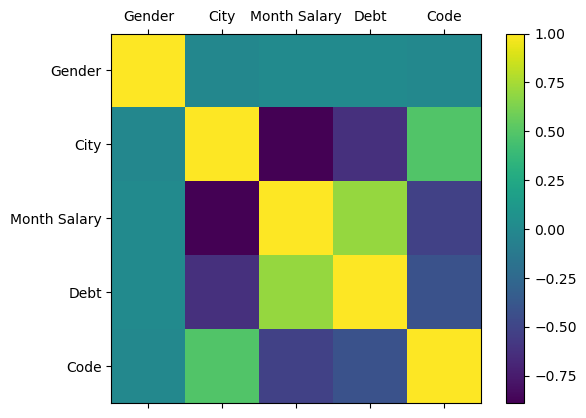

In [151]:
alpha = dataset.corr(numeric_only=True).columns


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(numeric_only=True))
fig.colorbar(cax)

xaxis = np.arange(len(alpha))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(alpha)
ax.set_yticklabels(alpha)

plt.show()

We can see that the gender is correlated to nothing. 
City and Month Salary are highly correlated. Same for Debt and Month Salary.
Debt and city are correlated. Same for Month Salary and Code.
Before using this dataset for building a prediction model, I would remove the attribute Gender because it has no correlation.